In [1]:
from ultralytics import YOLO
import numpy as np
import cv2
from matplotlib import pyplot as plt 
import easyocr
import re
%matplotlib inline

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
image_dir = "./images/test_image16.jpg"

In [5]:
image = cv2.imread(image_dir)

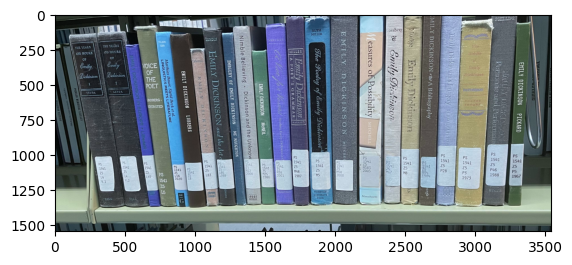

In [6]:
plt.imshow(image)

In [7]:
model = YOLO("./content/runs/detect/train/weights/best.pt")
result = model.predict(image_dir)


image 1/1 c:\Users\Dell\Documents\stacks_call_number\images\test_image16.jpg: 288x640 22 call_numbers, 180.4ms
Speed: 3.0ms preprocess, 180.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 640)


In [8]:
call_numbers = []
image_show = image.copy()
boxes = result[0].boxes
sorted_boxes = np.array([])

test_boxes = [box.xyxy.numpy() for box in boxes]
# reshaping so that the wrapper array is removed
test_boxes = [box[0] for box in test_boxes]

#sorting based on x axis values
sorted_boxes = np.array(sorted(test_boxes, key = lambda i: i[0]))

In [10]:
# keep track of how many items filtered
# and delete dynamically
removed = 0
for index , box in enumerate(sorted_boxes):
    x1, y1, x2, y2 = [int(i) for i in box]
    
    aspect = (y2 - y1) / (x2 - x1)
    width_threshold_met = (x2 - x1) < image.shape[0] * 0.1 and (x2 - x1)
    height_threshold_met = (y2 - y1) < image.shape[1] * 0.1 and (x2 - x1)
    
    if width_threshold_met and height_threshold_met and (aspect >= 1 and aspect < 3):
        print(f"{index} ok", box)
        call_numbers.append(image[y1:y2, x1:x2])
        cv2.rectangle(image_show, (x1, y1), (x2, y2), (0, 0, 255), 10)
    else:
        print(f"{index} not ok", box)
        sorted_boxes = np.delete(sorted_boxes,index - removed, 0)
        removed += 1

0 ok [     284.84      1010.8      419.79      1256.7]
1 ok [     472.06      1008.9      601.71      1259.4]
2 ok [     631.91      1004.3      720.59      1248.4]
3 ok [     837.28      1070.4      928.67      1248.3]
4 ok [     934.23      1057.6      1042.7      1250.9]
5 ok [     1060.4      1043.6      1151.9      1242.5]
6 ok [     1159.7      1034.8      1265.2      1240.4]
7 ok [     1354.2      1032.9      1453.3      1240.4]
8 ok [     1462.8      1029.7      1554.9      1232.9]
9 ok [     1570.4      1037.9      1686.4        1245]
10 ok [     1694.6       965.5      1810.6      1227.8]
11 ok [     1826.9       986.7      1961.6      1246.5]
12 ok [       1993      1033.9      2132.7      1250.1]
13 ok [     2168.7      740.33      2310.1      947.09]
14 ok [     2169.6      998.87      2314.8      1236.6]
15 ok [     2344.2      1007.9      2458.1      1219.8]
16 ok [     2469.6      963.93      2589.6      1235.3]
17 ok [     2603.5      1014.5      2708.1      1234.4]
18

In [11]:
sorted_boxes

array([[     284.84,      1010.8,      419.79,      1256.7],
       [     472.06,      1008.9,      601.71,      1259.4],
       [     631.91,      1004.3,      720.59,      1248.4],
       [     837.28,      1070.4,      928.67,      1248.3],
       [     934.23,      1057.6,      1042.7,      1250.9],
       [     1060.4,      1043.6,      1151.9,      1242.5],
       [     1159.7,      1034.8,      1265.2,      1240.4],
       [     1354.2,      1032.9,      1453.3,      1240.4],
       [     1462.8,      1029.7,      1554.9,      1232.9],
       [     1570.4,      1037.9,      1686.4,        1245],
       [     1694.6,       965.5,      1810.6,      1227.8],
       [     1826.9,       986.7,      1961.6,      1246.5],
       [       1993,      1033.9,      2132.7,      1250.1],
       [     2168.7,      740.33,      2310.1,      947.09],
       [     2169.6,      998.87,      2314.8,      1236.6],
       [     2344.2,      1007.9,      2458.1,      1219.8],
       [     2469.6,    

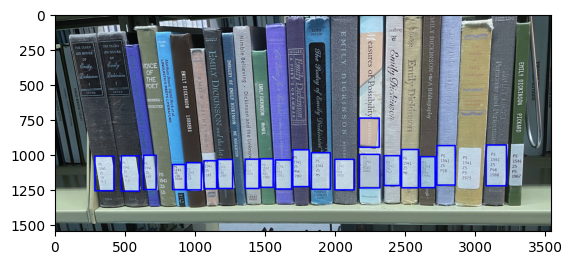

In [12]:
plt.imshow(image_show)

In [13]:
# easy ocr implementation

In [14]:
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [109]:
# constants
__LETTER          = "letter"
__BAD_LETTER      = "b_letter"
__NUMBER          = "number"
__BAD_NUMBER      = "b_number"
__CUTTER          = "cutter"
__BAD_CUTTER      = "b_cutter"
__DATE            = "date"
__BAD_DATE        = "bad_date"
__FIRST_CUTTER    = "first_cutter"
__SECOND_CUTTER   = "second_cutter"

__CURRENT_DATE    = 2023
__OLDEST_DATE     = 1000

__STATUS_NAN      = 100
__STATUS_OK       = 200
__STATUS_MISMATCH = 300
__STATUS_FLAGGED  = 500

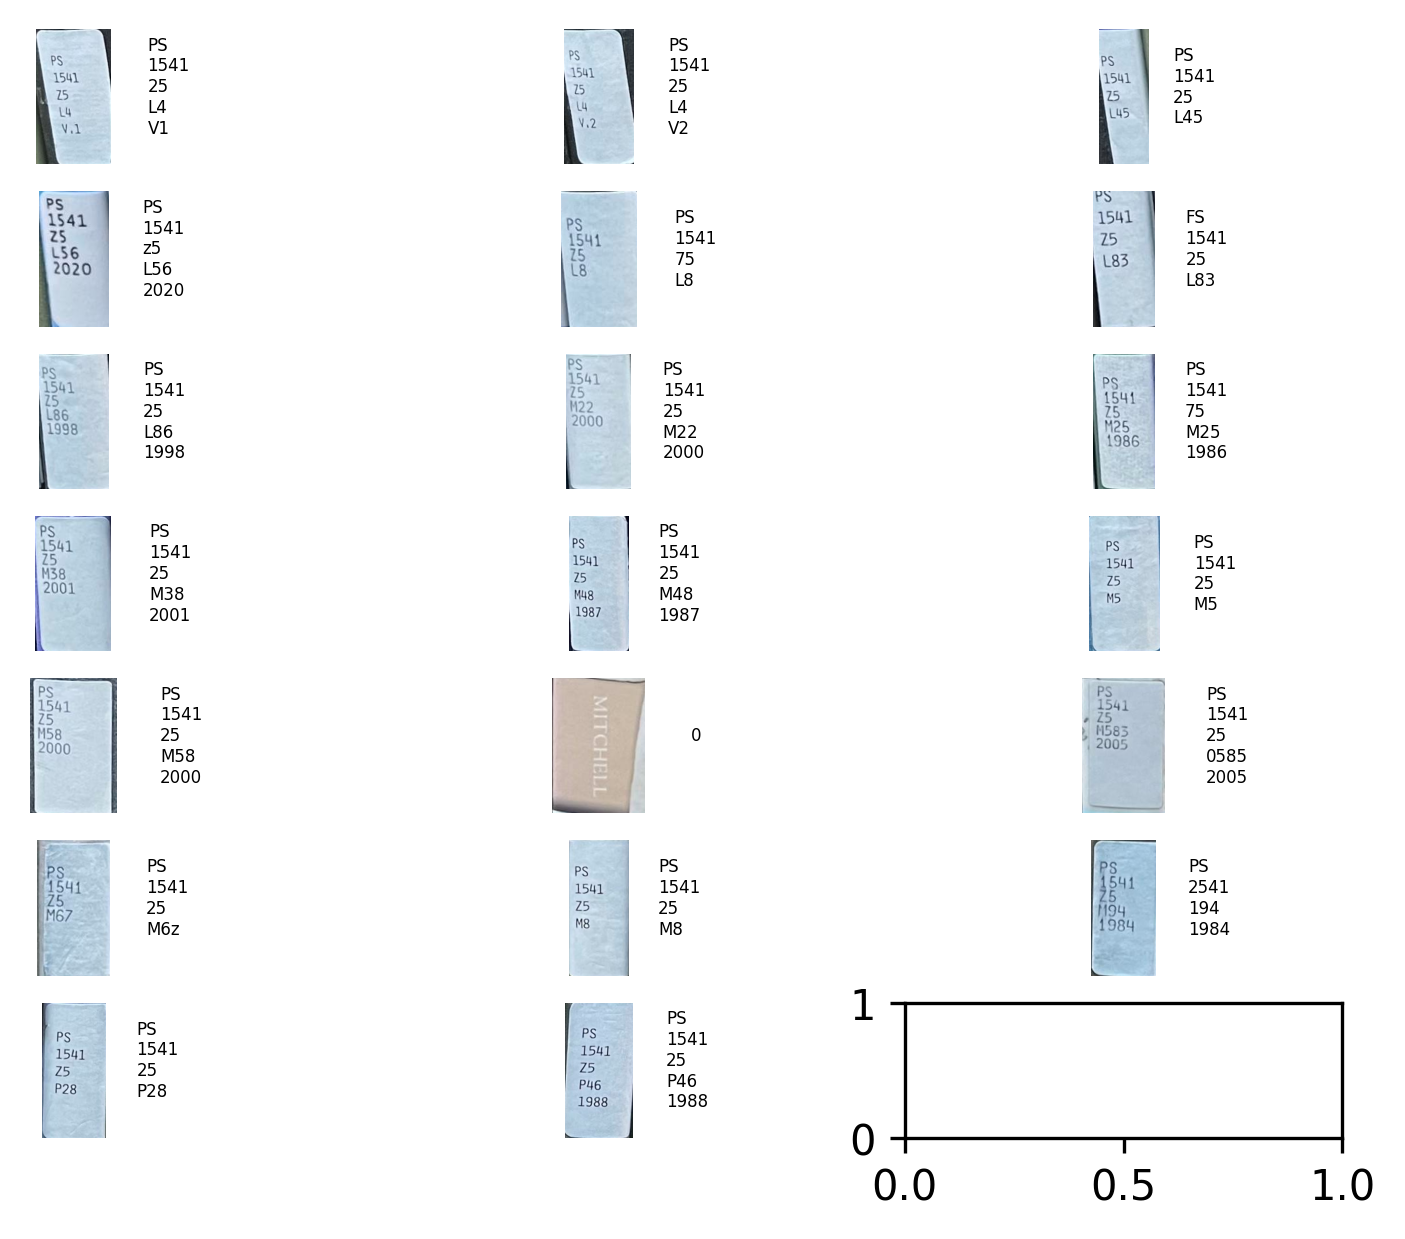

In [17]:
call_number_array = np.array([])
columns = 3
fig, ax = plt.subplots(int(len(call_numbers) / columns) + 1, columns, dpi=300)
  
for i, call_number in enumerate(call_numbers):
    
    result = reader.readtext(call_number, allowlist='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz')
    text = ''
    for r in result:
        text += r[1] + '\n'
    call_number_array_tmp = text.rstrip('\n').split('\n')
    if len(call_number_array_tmp > 2):
        call_number_array = np.append(call_number_array, {'call_number': text.rstrip('\n').split('\n'), 'status': __STATUS_OK})
    else:
        pass
    
    img_cell = ax[int(i / columns)][i % columns]
    img_cell.axis('off')  
    img_cell.imshow(call_number)
    img_cell.text(1.5, 0.5, text, size = 4, verticalalignment = 'center', transform = img_cell.transAxes)


In [18]:
def check_element_errors(element, original_type):

    # first call letter
    if original_type == __LETTER:
        ret = re.findall("[A-Z]{0,}", element)
        if len(ret) == 0:
            return __BAD_LETTER
        if ret[0] == element:
            return __LETTER
        else:
            return __BAD_LETTER
    
    # number
    if original_type == __NUMBER:
        ret = re.findall("[0-9]{0,}", element)
        if len(ret) == 0:
            return __BAD_NUMBER
        if ret[0] == element:
            return __NUMBER
        else:
            return __BAD_NUMBER
    
    # if the given input is a date
    if original_type == __DATE:
        ret = re.findall("[0-9]{4}[A-Z]{0,}", element)
        if len(ret):
            if ret[0] == element:
                year = int(re.findall("[0-9]{0,4}", element)[0])
                if year <= __CURRENT_DATE and year > __OLDEST_DATE:
                    return __DATE
                else:
                    return __BAD_DATE
        else:
            return __BAD_DATE
    
    #if the item is not a date then it might be cutter 2
    if original_type == __CUTTER:
        
        # cutter 2 might be sometimes confused with dates
        ret = re.findall("[0-9]{4}[A-Z]{0,}", element)
        if len(ret):
            if ret[0] == element:
                year = int(re.findall("[0-9]{4}", element)[0])
                if year <= __CURRENT_DATE and year > __OLDEST_DATE:
                    return __DATE
                else:
                    return __BAD_DATE
        
        ret = re.findall("[A-Z]{1}[0-9]{0,}", element)
        if len(ret) == 0:
            return __BAD_CUTTER
        if ret[0] == element:
            return __CUTTER
        else:
            return __BAD_CUTTER

In [74]:
def get_prev_next(arr, i):
    prev_status_none = i == 0
    next_status_none = i == (len(arr) - 1)
    pcn, ncn = [],[]
    try:
        pcn = arr[i - 1]
        ncn = arr[i + 1]
    except:
        if prev_status_none:
            pcn = ncn = arr[i + 1]
        elif next_status_none:
            pcn = ncn = arr[i - 1]

    return [pcn, ncn]

In [89]:
def cutter_filter(cn):  
    letter = cn[0]
    decimal = cn[1:]
    
    translate_map = {
        ord("A"): "4",
        ord("B"): "8",
        ord("C"): "6",
        ord("D"): "0",
        ord("E"): "3",
        ord("F"): "7",
        ord("G"): "9",
        ord("H"): "4",
        ord("I"): "1",
        ord("J"): "7",
        ord("K"): "14",
        ord("L"): "1",
        ord("M"): "4",
        ord("N"): "5",
        ord("O"): "0",
        ord("P"): "9",
        ord("Q"): "9",
        ord("R"): "3",
        ord("S"): "5",
        ord("T"): "7",
        ord("U"): "0",
        ord("V"): "6",
        ord("W"): "6",
        ord("X"): "1",
        ord("Y"): "4",
        ord("Z"): "2"
    }
    decimal = decimal.translate(translate_map)
    try:
        possible_int = int(letter)
    except:
        possible_int = letter
    return possible_int + decimal
        

In [115]:
# staging and filtering for possibly wrong call numbers for parsing

#method: manual parsing
# find all the errors
# "fix" the error by comparing items to adjecent call numbers and flag them 
for index, call_number in enumerate(call_number_array):
    
    flagged = False
    cutter1 = None
    cutter2 = None
    edition = None
    
    prev_cn, next_cn = get_prev_next(call_number_array, index)

    if len(call_number['call_number']) < 3:
        call_number_array[index]['status'] = __STATUS_NAN
        pass
    
    if len(call_number['call_number']) == 3:
        letters, numbers, cutter1 = call_number['call_number']
    if len(call_number['call_number']) == 4:
        letters, numbers, cutter1, cutter2 = call_number['call_number']
    if len(call_number['call_number']) == 5:
        letters, numbers, cutter1, cutter2, edition = call_number['call_number']
        
    # check for letters
    res = check_element_errors(letters, __LETTER)
    if res != __LETTER:
        if not flagged:
            call_number_array[index]['status'] = __STATUS_FLAGGED
            flagged = True
            
        if prev_cn['call_number'][0] == next_cn['call_number'][0]:
            call_number_array[index]['call_number'][0] = prev_cn['call_number'][0]
            
    # check for numbers
    res = check_element_errors(numbers, __NUMBER)
    if res != __NUMBER:
        if not flagged:
            call_number_array[index]['status'] = __STATUS_FLAGGED
            flagged = True
            
        if prev_cn['call_number'][1] == next_cn['call_number'][1]:
            call_number_array[index]['call_number'][1] = prev_cn['call_number'][1]
            
    # check for first cutter
    if cutter1 is not None:
        res = check_element_errors(cutter1, __CUTTER)
        if res != __CUTTER:
            if not flagged:
                call_number_array[index]['status'] = __STATUS_FLAGGED
                flagged = True

            call_number_array[index]['call_number'][2] = cutter_filter(call_number_array[index]['call_number'][2])


                    
    # check for second cutter
    if cutter2 is not None:
        res = check_element_errors(cutter2, __CUTTER)
        if res == __DATE and edition != None:
            if not flagged:
                call_number_array[index]['status'] = __STATUS_FLAGGED
                flagged = True

            call_number_array[index]['call_number'][3] = prev_cn['call_number'][3][0] + call_number_array[index]['call_number'][3][1:]
            
        if res != __CUTTER and  res != __DATE and res == __BAD_CUTTER:
            if not flagged:
                call_number_array[index]['status'] = __STATUS_FLAGGED
                flagged = True
            
            call_number_array[index]['call_number'][3] = cutter_filter(call_number_array[index]['call_number'][3], prev_cn['call_number'][3][0])
    
    # check for edition
    if edition is not None:
        res = check_element_errors(edition, __DATE)
        if res == __BAD_DATE:
            if not flagged:
                call_number_array[index]['status'] = __STATUS_FLAGGED
                flagged = True
                
            call_number_array[index]['call_number'][4] = ''

In [116]:
# call numbers
import pycallnumber as pycn

In [117]:
call_number_str = np.array([])
for cns_arr in call_number_array:
    cn = cns_arr['call_number']
    sts = cns_arr['status']
    value = {"call_number": '\n'.join(cn), 
    "status": sts}
    call_number_str = np.append(call_number_str, value)

In [140]:
call_number_str

array([{'call_number': 'PS\n1541\nK55\nL4\n', 'status': 500}, {'call_number': 'PS\n1541\nK555\nL4\n', 'status': 500}, {'call_number': 'PS\n1541\nK5555\nL45', 'status': 500}, {'call_number': 'PS\n1541\nK5\nL56\n2020', 'status': 500}, {'call_number': 'PS\n1541\nK5\nL8', 'status': 500},
       {'call_number': 'FS\n1541\nK5\nL83', 'status': 500}, {'call_number': 'PS\n1541\nK5\nL86\n1998', 'status': 500}, {'call_number': 'PS\n1541\nK5\nM22\n2000', 'status': 500}, {'call_number': 'PS\n1541\nK5\nM25\n1986', 'status': 500}, {'call_number': 'PS\n1541\nK5\nM38\n2001', 'status': 500},
       {'call_number': 'PS\n1541\nK5\nM48\n1987', 'status': 500}, {'call_number': 'PS\n1541\nK5\nM5', 'status': 500}, {'call_number': 'PS\n1541\nK5\nM58\n2000', 'status': 500}, {'call_number': '0', 'status': 100}, {'call_number': 'PS\n1541\nK5\n0585\n2005', 'status': 500},
       {'call_number': 'PS\n1541\nK55\nM6z', 'status': 500}, {'call_number': 'PS\n1541\nK555\nM8', 'status': 500}, {'call_number': 'PS\n2541\nK55

In [151]:
# creates new boxes array without the flagged call numbers

flag_ignored_mode = False
nan_ignored_mode = False

parsed_cns_flag_ignored = np.array([])
parsed_cns = np.array([])

for i, cn in enumerate(call_number_str):
    parsed_cns = np.append(parsed_cns, pycn.callnumber(cn['call_number']))
    if cn['status'] == __STATUS_OK:
        parsed_cns_flag_ignored = np.append(parsed_cns_flag_ignored, pycn.callnumber(cn['call_number']))

if flag_ignored_mode:
        parsed_cns = parsed_cns_flag_ignored


In [152]:
# sorts the call numbers
sorted_cns = np.array(sorted(parsed_cns))

In [153]:
# finds the position of call numbers in sorted array
is_cns_sorted = (sorted_cns == parsed_cns).all()
indices_sorted = np.array([]).astype(int)
for parsed_cn in parsed_cns:
    indices_in_cns_sorted = np.where(sorted_cns == parsed_cn)[0][0] + 1 #gets the first instance and converts from array index 0-inf to 1-inf
    indices_sorted = np.append(indices_sorted, indices_in_cns_sorted)


In [156]:
image_call_number_status = image.copy()

image_call_number_status = image.copy()
image_call_number_status = cv2.cvtColor(image_call_number_status, cv2.COLOR_BGR2RGB)


# if flag_ignored_mode:
#     sorted_boxes = sorted_boxes_flag_ignored
sorted_index = 0
for i, box in enumerate(sorted_boxes):
    x1, y1, x2, y2 = [int(i) for i in box]

    if call_number_str[i]['status'] == __STATUS_NAN:
        if not nan_ignored_mode:
            cv2.rectangle(image_call_number_status, (x1, y1), (x2, y2), (255, 0, 0), 5)
            cv2.putText(image_call_number_status, str(indices_sorted[i]), (x1 + 10, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (36,255,12), 5)
            sorted_index += 1
        cv2.rectangle(image_call_number_status, (x1, y1), (x2, y2), (255, 0, 0), 5)
    
    if call_number_str[i]['status'] == __STATUS_OK:
        cv2.rectangle(image_call_number_status, (x1, y1), (x2, y2), (0, 255, 0), 10)
        
        cv2.putText(image_call_number_status, str(indices_sorted[sorted_index]), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (36,255,12), 5)
        sorted_index += 1
    elif call_number_str[i]['status'] == __STATUS_FLAGGED:
        if not flag_ignored_mode:
            cv2.putText(image_call_number_status, str(indices_sorted[i]), (x1 + 10, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (36,255,12), 5)
            sorted_index += 1
        cv2.rectangle(image_call_number_status, (x1, y1), (x2, y2), (255, 255, 0), 10)

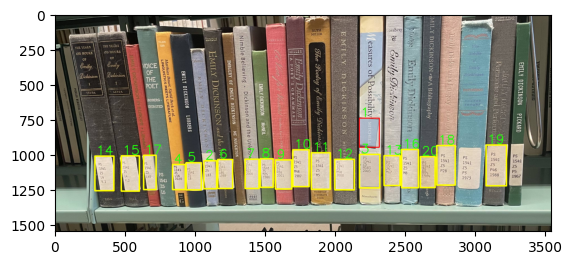

In [157]:
plt.imshow(image_call_number_status)

In [99]:
if np.all(is_sorted == True):
    print("The call numbers seem to be sorted")
else:
    print("The call numbers seem not to be sorted")

NameError: name 'is_sorted' is not defined